In [8]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [4]:
# reading clean csv
print("================================Benin====================================")
data_benin_clean = pd.read_csv('/content/drive/MyDrive/Tenx program/week-0/data/cleaned/benin-malanville-clean.csv')
print(data_benin_clean.head())
print("================================Sierraleone====================================")
data_sierraleone_clean = pd.read_csv('/content/drive/MyDrive/Tenx program/week-0/data/cleaned/sierraleone-bumbuna-clean.csv')
print(data_sierraleone_clean.head())
print("================================Togo====================================")
data_togo_clean = pd.read_csv('/content/drive/MyDrive/Tenx program/week-0/data/cleaned/togo-dapaong-clean.csv')
print(data_togo_clean.head())

================================Benin====================================
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  
================================Sierr

In [5]:
data_benin_clean['Country'] = 'Benin'
data_sierraleone_clean['Country'] = 'Sierra Leone'
data_togo_clean['Country'] = 'Togo'

# combine datasets explicitly
combined_df = pd.concat([data_benin_clean, data_sierraleone_clean, data_togo_clean], ignore_index=True)
combined_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


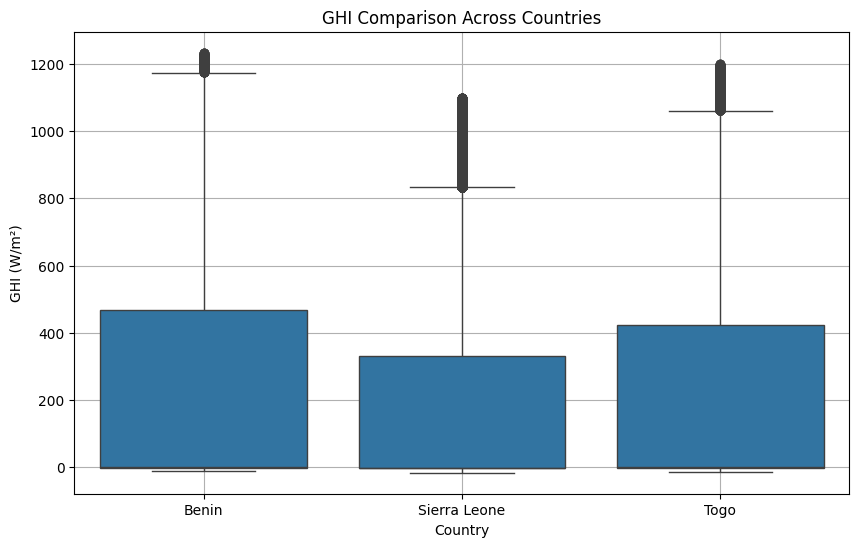

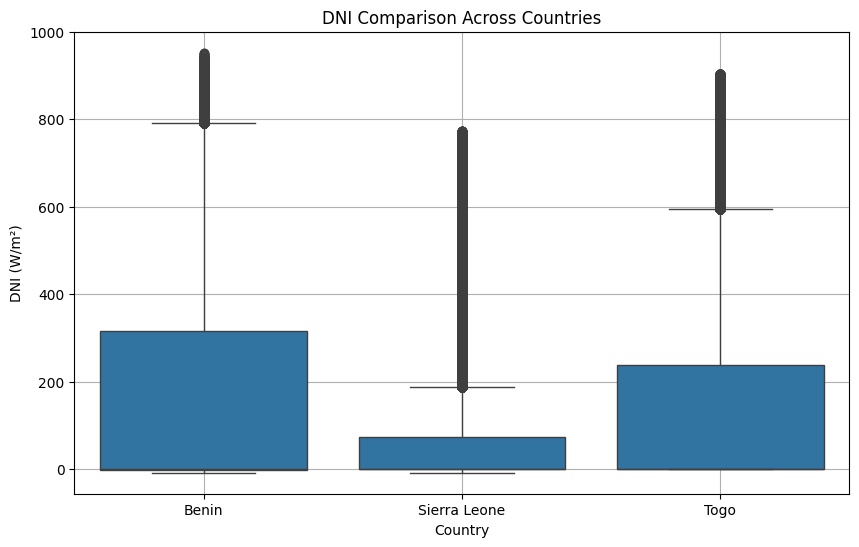

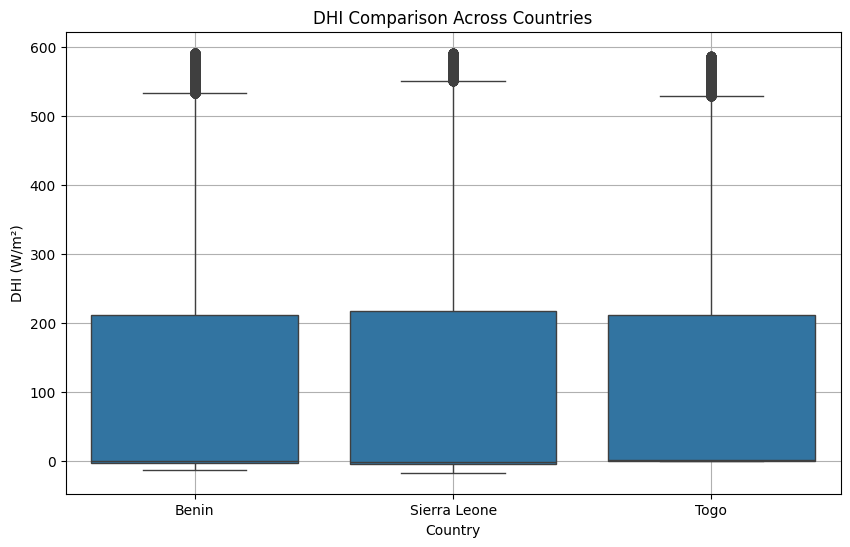

In [6]:
# compare side by side using boxplot
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=metric, data=combined_df)
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.grid(True)
    plt.show()

In [7]:
# summary statistics table

summary_table = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary_table

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [10]:
# ANOVA explicitly (parametric test)
anova_result = f_oneway(
    data_benin_clean['GHI'],
    data_sierraleone_clean['GHI'],
    data_togo_clean['GHI']
)

# Kruskal-Wallis explicitly (non-parametric test)
kruskal_result = kruskal(
    data_benin_clean['GHI'],
    data_sierraleone_clean['GHI'],
    data_togo_clean['GHI']
)

# Display p-values
print("ANOVA p-value:", anova_result.pvalue)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


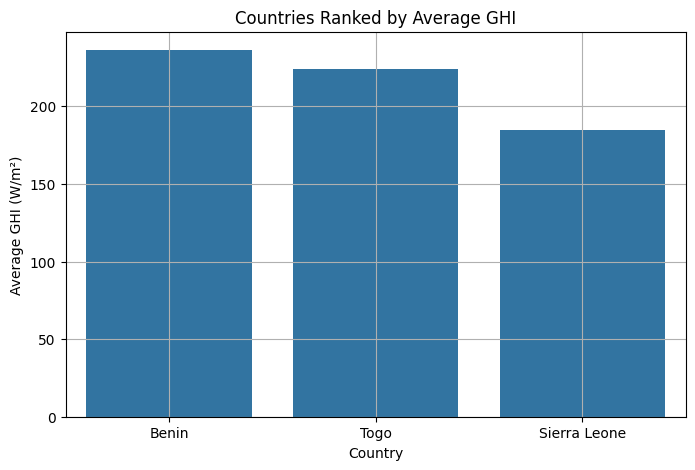

In [11]:
#bar chart ranking countries to average GHI

avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values)
plt.title('Countries Ranked by Average GHI')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.grid(True)
plt.show()


In [ ]:
!cp ''